In [1]:
# Import Dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure


In [2]:
# File to Load
Data_to_load = "/Users/daniellomeland/Test/Flu_Fighters/Resources/final_data.csv"
flufighter_df = pd.read_csv(Data_to_load, low_memory=False,thousands=',')
flufighter_df.head()

,Unnamed: 0,US State Name,State_x,State_x.1,Month_x,Avg_temp,Density (Pop./ mi2),Population,sick death,all death,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Sick_death_rate(in 1000 people_wkly),All_death_rate(in 1000 people_wkly),sick of all death,GDP per capita
0,0,Alabama,AL,Alabama,January,45.525000,95.0,4858979,93.255814,1081.883721,0.24,0.09,0.11,0.26,0.14,0.17,0.019192,0.222657,0.086198,36404
1,1,Alaska,AK,Alaska,January,11.930000,1.0,738432,4.813953,82.255814,0.27,0.09,0.14,0.26,0.13,0.11,0.006519,0.111393,0.058524,69326
2,2,Arizona,AZ,Arizona,January,45.960000,60.0,6828065,90.232558,1099.395349,0.25,0.09,0.12,0.25,0.12,0.17,0.013215,0.161011,0.082075,38340
3,3,Arkansas,AR,Arkansas,January,40.433333,57.0,2978204,67.418605,660.209302,0.25,0.09,0.11,0.25,0.13,0.17,0.022637,0.221680,0.102117,35412
4,4,California,CA,California,January,49.237500,251.0,39144818,612.139535,5480.674419,0.24,0.10,0.14,0.27,0.12,0.14,0.015638,0.140010,0.111691,54232


In [3]:
# convert GDP data to numeric
pd.to_numeric(flufighter_df['GDP per capita'])
# group by state
grouped_df =flufighter_df.groupby(['US State Name'])
grouped_df.head()

,Unnamed: 0,US State Name,State_x,State_x.1,Month_x,Avg_temp,Density (Pop./ mi2),Population,sick death,all death,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Sick_death_rate(in 1000 people_wkly),All_death_rate(in 1000 people_wkly),sick of all death,GDP per capita
0,0,Alabama,AL,Alabama,January,45.525000,95.0,4858979,93.255814,1081.883721,0.24,0.09,0.11,0.26,0.14,0.17,0.019192,0.222657,0.086198,36404
1,1,Alaska,AK,Alaska,January,11.930000,1.0,738432,4.813953,82.255814,0.27,0.09,0.14,0.26,0.13,0.11,0.006519,0.111393,0.058524,69326
2,2,Arizona,AZ,Arizona,January,45.960000,60.0,6828065,90.232558,1099.395349,0.25,0.09,0.12,0.25,0.12,0.17,0.013215,0.161011,0.082075,38340
3,3,Arkansas,AR,Arkansas,January,40.433333,57.0,2978204,67.418605,660.209302,0.25,0.09,0.11,0.25,0.13,0.17,0.022637,0.221680,0.102117,35412
4,4,California,CA,California,January,49.237500,251.0,39144818,612.139535,5480.674419,0.24,0.10,0.14,0.27,0.12,0.14,0.015638,0.140010,0.111691,54232
5,5,Colorado,CO,Colorado,January,27.080000,52.0,5456574,60.325581,731.604651,0.24,0.09,0.14,0.27,0.13,0.14,0.011056,0.134078,0.082457,50728
6,6,Connecticut,CT,Connecticut,January,28.600000,741.0,3590886,61.162791,645.767442,0.22,0.09,0.11,0.27,0.15,0.17,0.017033,0.179835,0.094713,63833
7,7,Delaware,DE,Delaware,January,32.400000,485.0,945934,14.837209,179.953488,0.22,0.08,0.12,0.25,0.14,0.18,0.015685,0.190239,0.082450,63101
8,8,Florida,FL,Florida,January,59.276923,378.0,20271272,259.860465,3878.139535,0.21,0.08,0.11,0.25,0.14,0.20,0.012819,0.191312,0.067006,38492
9,9,Georgia,GA,Georgia,January,46.100000,177.0,10214860,124.883721,1637.790698,0.26,0.09,0.12,0.27,0.12,0.14,0.012226,0.160334,0.076251,42858


In [4]:
# define datapoints
GDP=grouped_df["GDP per capita"].mean()
GDP= GDP/1000
avg_sick_death=grouped_df["Sick_death_rate(in 1000 people_wkly)"].mean()*52
avg_all_death=grouped_df["All_death_rate(in 1000 people_wkly)"].mean()*52
old_percent=grouped_df["65+"].mean()
young_percent=grouped_df["Adults 26-34"].mean()

In [5]:
Viz_data=pd.DataFrame({
    "GDP per capita": GDP,
    "Annual Sickness Mortality (per thousand people)": avg_sick_death,
"Annual Overall Mortality (per thousand people)": avg_all_death,
"Age 65+ % of total":old_percent,
"Age 26-34 % of total":young_percent})
Viz_data.head()

,GDP per capita,Annual Sickness Mortality (per thousand people),Annual Overall Mortality (per thousand people),Age 65+ % of total,Age 26-34 % of total
US State Name,,,,,
Alabama,36.404,0.668389,10.395454,0.17,0.11
Alaska,69.326,0.328839,5.529722,0.11,0.14
Arizona,38.340,0.485091,7.647022,0.17,0.12
Arkansas,35.412,0.812139,10.277937,0.17,0.11
California,54.232,0.552163,6.400295,0.14,0.14


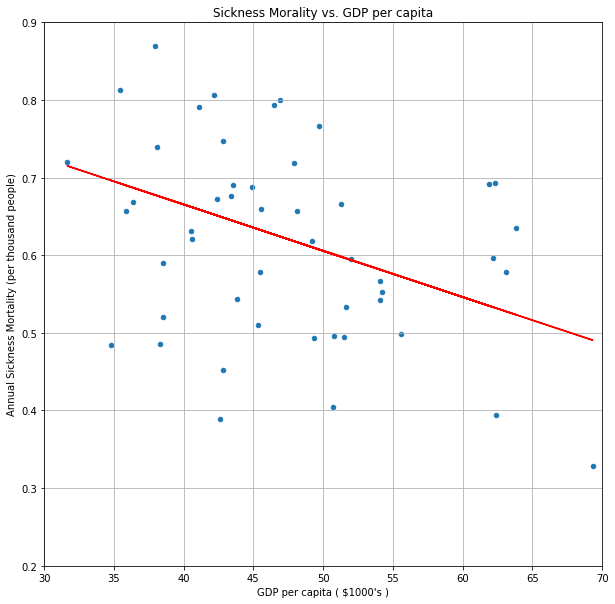

In [9]:
Viz_data.plot(kind="scatter", x="GDP per capita", y="Annual Sickness Mortality (per thousand people)", grid=True, figsize=(10,10),
              title="Sickness Morality vs. GDP per capita")

plt.ylim(0.2, .9)
plt.xlim(30, 70)


# calc the trendline
z = np.polyfit(Viz_data["GDP per capita"], Viz_data["Annual Sickness Mortality (per thousand people)"], 1)
p = np.poly1d(z)
plt.xlabel("GDP per capita ( $1000's )")
plt.plot(Viz_data["GDP per capita"],p(Viz_data["GDP per capita"]),"red")
plt.savefig('Sickness_Morality_vs_GDP_per_capita.png')
plt.show()

In [ ]:

Viz_data.plot(kind="scatter", x="GDP per capita", y="Annual Overall Mortality (per thousand people)", grid=True, figsize=(10,10),
              title="Overall Mortality vs. GDP per capita")

plt.ylim(0, 15)
plt.xlim(30, 70)


# calc the trendline
z = np.polyfit(Viz_data["GDP per capita"], Viz_data["Annual Overall Mortality (per thousand people)"], 1)
p = np.poly1d(z)
plt.xlabel("GDP per capita ( $1000's )")
plt.plot(Viz_data["GDP per capita"],p(Viz_data["GDP per capita"]),"red")
plt.savefig('Overall_Mortality_vs_GDP_per_capita.png')
plt.show()

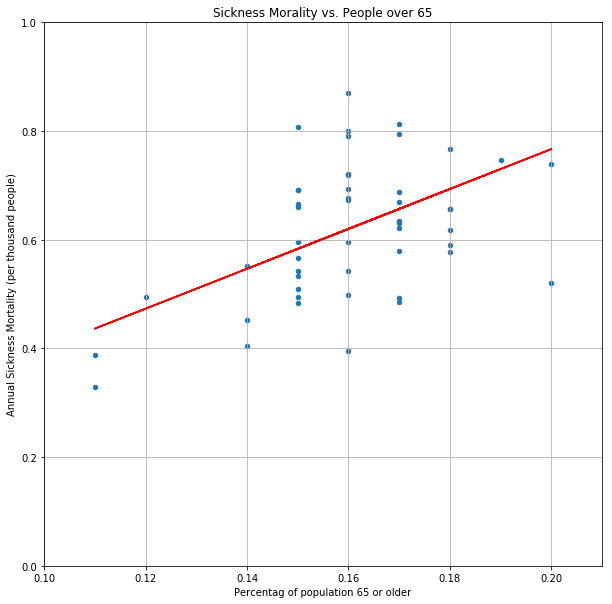

In [11]:
Viz_data.plot(kind="scatter", x="Age 65+ % of total", y="Annual Sickness Mortality (per thousand people)", grid=True, figsize=(10,10),
              title="Sickness Morality vs. People over 65")

plt.ylim(0, 1)
plt.xlim(0.1,0.21)


# calc the trendline
z = np.polyfit(Viz_data["Age 65+ % of total"], Viz_data["Annual Sickness Mortality (per thousand people)"], 1)
p = np.poly1d(z)
plt.plot(Viz_data["Age 65+ % of total"],p(Viz_data["Age 65+ % of total"]),"red")
plt.xlabel("Percentag of population 65 or older")
plt.savefig('Sickness_Morality_vs_People_over_age_65.png')
plt.show()

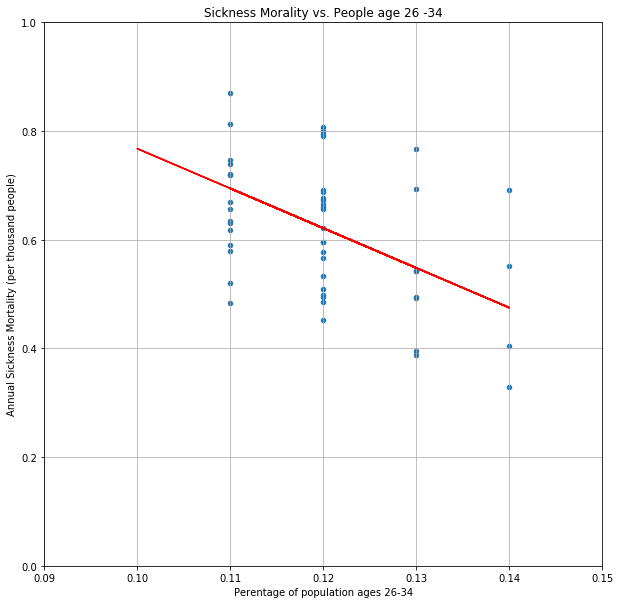

In [10]:
Viz_data.plot(kind="scatter", x="Age 26-34 % of total", y="Annual Sickness Mortality (per thousand people)", grid=True, figsize=(10,10),
              title="Sickness Morality vs. People age 26 -34")

plt.ylim(0, 1)
plt.xlim(0.09,0.15)


# calc the trendline
z = np.polyfit(Viz_data["Age 26-34 % of total"], Viz_data["Annual Sickness Mortality (per thousand people)"], 1)
p = np.poly1d(z)
plt.xlabel("Perentage of population ages 26-34")
plt.plot(Viz_data["Age 26-34 % of total"],p(Viz_data["Age 26-34 % of total"]),"red")
plt.savefig('Sickness_Morality_vs_People_age_26-34.png')
plt.show()